<a href="https://colab.research.google.com/github/dhrubo04-2000/my_first_repository/blob/main/ML_for_biomarker_vst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install pycaret

In [46]:
from pycaret.classification import *

In [47]:
import pandas as pd
df = pd.read_csv('/content/vst_filtered_predictive_genes_lgg.csv')

In [48]:
df.head()

,sample_id,ACAA2,ACAD11,ACCS,ACSL6,AGK,AGXT,ALDH1B1,ALDH2,ALKBH7,...,TEFM,TIMM13,TIMM23,TIMM8B,TOMM5,TSPO,TSTD1,TSTD3,UCP2,Target
0,CGGA_1001,11.024632,4.182519,10.834808,9.302219,10.321040,5.091160,10.479901,12.761621,11.034907,...,8.443017,10.912088,8.427462,9.916595,6.587384,12.275181,8.589950,6.644079,13.744219,Cancer
1,CGGA_1004,11.033641,4.182519,11.959476,11.685403,8.951311,4.182519,8.981461,12.677460,10.284350,...,8.595978,10.153787,8.104533,9.459445,6.825905,11.791187,7.148442,7.036101,12.586515,Cancer
2,CGGA_1005,9.499940,5.065844,8.633485,12.532471,9.689871,4.182519,10.188127,12.997647,10.412879,...,8.001306,10.801456,8.485517,9.857662,7.479176,9.773314,6.639831,6.880002,9.607809,Cancer
3,CGGA_1006,10.655380,5.073634,10.178273,9.007783,10.052738,7.688835,9.821386,9.251755,11.342144,...,8.003949,11.798269,8.295272,10.287570,5.623252,11.085090,6.709737,5.842605,11.218794,Cancer
4,CGGA_1007,10.982079,4.182519,9.400087,11.250487,9.982420,4.182519,9.765125,12.261729,10.550274,...,8.230399,11.048599,8.105836,9.735506,6.478573,10.098636,8.992466,6.795900,10.480589,Cancer


In [49]:
# sample_id column

df = df.drop(['sample_id'], axis=1)
df.head()

,ACAA2,ACAD11,ACCS,ACSL6,AGK,AGXT,ALDH1B1,ALDH2,ALKBH7,AMACR,...,TEFM,TIMM13,TIMM23,TIMM8B,TOMM5,TSPO,TSTD1,TSTD3,UCP2,Target
0,11.024632,4.182519,10.834808,9.302219,10.321040,5.091160,10.479901,12.761621,11.034907,6.016127,...,8.443017,10.912088,8.427462,9.916595,6.587384,12.275181,8.589950,6.644079,13.744219,Cancer
1,11.033641,4.182519,11.959476,11.685403,8.951311,4.182519,8.981461,12.677460,10.284350,6.272205,...,8.595978,10.153787,8.104533,9.459445,6.825905,11.791187,7.148442,7.036101,12.586515,Cancer
2,9.499940,5.065844,8.633485,12.532471,9.689871,4.182519,10.188127,12.997647,10.412879,6.639831,...,8.001306,10.801456,8.485517,9.857662,7.479176,9.773314,6.639831,6.880002,9.607809,Cancer
3,10.655380,5.073634,10.178273,9.007783,10.052738,7.688835,9.821386,9.251755,11.342144,6.899192,...,8.003949,11.798269,8.295272,10.287570,5.623252,11.085090,6.709737,5.842605,11.218794,Cancer
4,10.982079,4.182519,9.400087,11.250487,9.982420,4.182519,9.765125,12.261729,10.550274,6.930537,...,8.230399,11.048599,8.105836,9.735506,6.478573,10.098636,8.992466,6.795900,10.480589,Cancer


In [50]:
#code Target column values Cancer as 0 and Normal as 1

df['Target'] = df['Target'].apply(lambda x: 0 if x == 'Cancer' else 1)
df.head()

,ACAA2,ACAD11,ACCS,ACSL6,AGK,AGXT,ALDH1B1,ALDH2,ALKBH7,AMACR,...,TEFM,TIMM13,TIMM23,TIMM8B,TOMM5,TSPO,TSTD1,TSTD3,UCP2,Target
0,11.024632,4.182519,10.834808,9.302219,10.321040,5.091160,10.479901,12.761621,11.034907,6.016127,...,8.443017,10.912088,8.427462,9.916595,6.587384,12.275181,8.589950,6.644079,13.744219,0
1,11.033641,4.182519,11.959476,11.685403,8.951311,4.182519,8.981461,12.677460,10.284350,6.272205,...,8.595978,10.153787,8.104533,9.459445,6.825905,11.791187,7.148442,7.036101,12.586515,0
2,9.499940,5.065844,8.633485,12.532471,9.689871,4.182519,10.188127,12.997647,10.412879,6.639831,...,8.001306,10.801456,8.485517,9.857662,7.479176,9.773314,6.639831,6.880002,9.607809,0
3,10.655380,5.073634,10.178273,9.007783,10.052738,7.688835,9.821386,9.251755,11.342144,6.899192,...,8.003949,11.798269,8.295272,10.287570,5.623252,11.085090,6.709737,5.842605,11.218794,0
4,10.982079,4.182519,9.400087,11.250487,9.982420,4.182519,9.765125,12.261729,10.550274,6.930537,...,8.230399,11.048599,8.105836,9.735506,6.478573,10.098636,8.992466,6.795900,10.480589,0


In [51]:
#set pycaret environment
clf_setup = setup(data=df,
                  target='Target',
                  session_id=42,
                  normalize=True,           # Apply ML scaling (Z-score, Min-Max, etc.)
                  normalize_method='zscore',# Or 'minmax', 'maxabs', 'robust'
                  transformation=False      # No additional power transformation needed
                 )

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(2844, 117)"
4,Transformed data shape,"(2844, 117)"
5,Transformed train set shape,"(1990, 117)"
6,Transformed test set shape,"(854, 117)"
7,Numeric features,116
8,Preprocess,True
9,Imputation type,simple


In [52]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1040
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0770
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2730
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1860
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1370
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8440
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6580
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0640
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2090
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

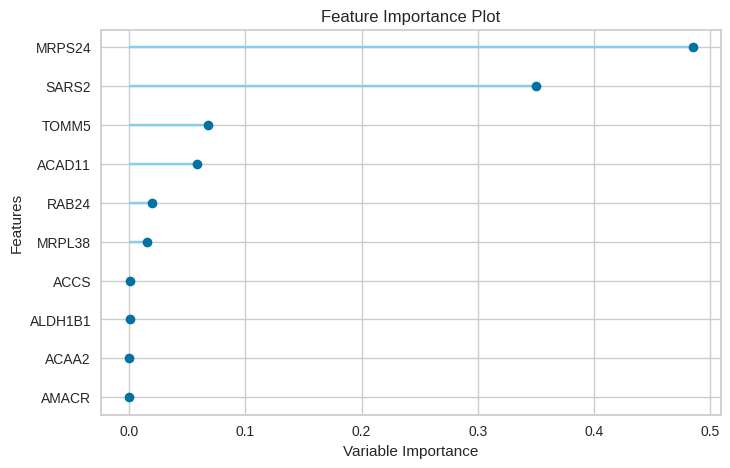

In [54]:
plot_model(xgboost, plot='feature')

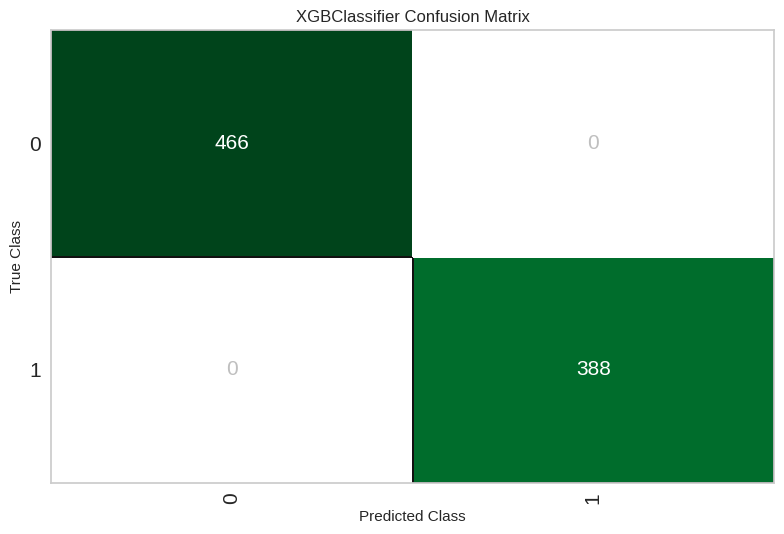

In [55]:
plot_model(xgboost, plot='confusion_matrix') # This expects `xgboost` to be a variable

In [56]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

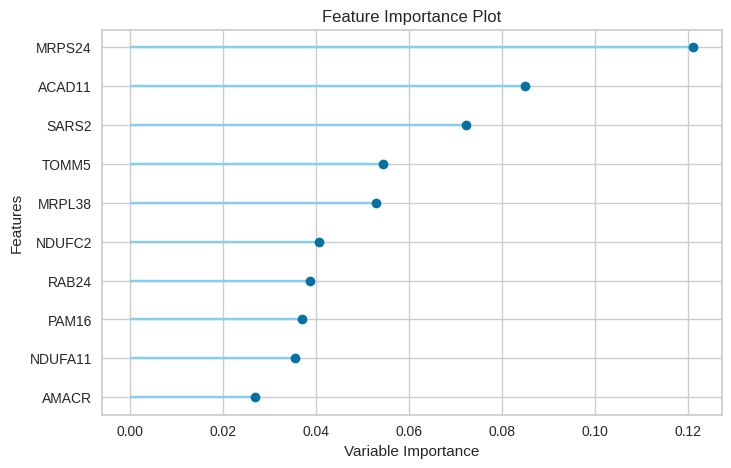

In [57]:
plot_model(et, plot='feature')

In [58]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

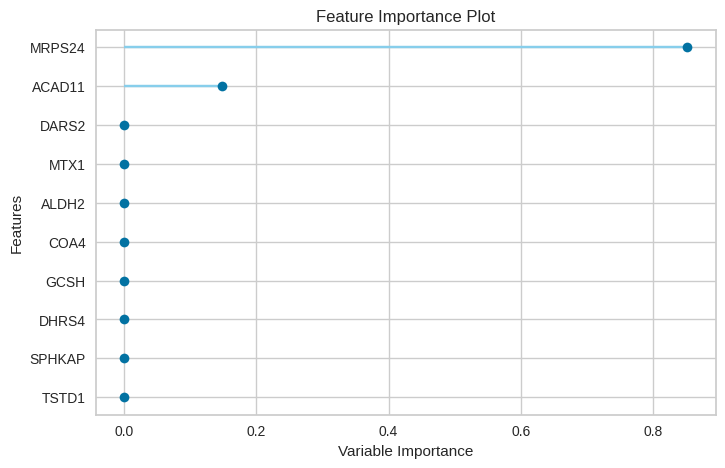

In [59]:
plot_model = plot_model(gbc, plot='feature')

In [60]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9950,0.9954,1.0000,0.9891,0.9945,0.9899,0.9899


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
# Get feature importances from xgboost(you can choose specific model)
feature_importance = pd.DataFrame({
    'Feature': xgboost.feature_names_in_,
    'Importance': xgboost.feature_importances_
})

# Sort and show top 30
top50 = feature_importance.sort_values(by='Importance', ascending=False).head(50)
print(top50)

     Feature  Importance
58    MRPS24    0.484635
94     SARS2    0.350372
111    TOMM5    0.068125
1     ACAD11    0.058821
90     RAB24    0.019818
56    MRPL38    0.015791
2       ACCS    0.000602
6    ALDH1B1    0.000524
0      ACAA2    0.000386
9      AMACR    0.000383
17       BAX    0.000356
11     APEX1    0.000116
69    NDUFS6    0.000069
78      PDK3    0.000000
88    PTPMT1    0.000000
87     PREPL    0.000000
86      PPIF    0.000000
85      POLQ    0.000000
84      POLB    0.000000
83      PNPO    0.000000
82      PIF1    0.000000
81    PEX11B    0.000000
80    PET117    0.000000
79    PET100    0.000000
76       PDF    0.000000
77      PDK2    0.000000
5       AGXT    0.000000
75     PDE2A    0.000000
74     PAM16    0.000000
73     PAICS    0.000000
72    PABPC5    0.000000
71      OXR1    0.000000
70      NEU4    0.000000
68    NDUFC2    0.000000
67    NDUFA9    0.000000
66    NDUFA2    0.000000
89     PTRH1    0.000000
91     RDH13    0.000000
64      NAGS    0.000000


In [62]:
holdout_pred = predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [63]:
holdout_pred.head()

,ACAA2,ACAD11,ACCS,ACSL6,AGK,AGXT,ALDH1B1,ALDH2,ALKBH7,AMACR,...,TIMM23,TIMM8B,TOMM5,TSPO,TSTD1,TSTD3,UCP2,Target,prediction_label,prediction_score
635,10.532004,4.667810,9.659060,8.085012,7.640585,6.619010,9.210989,10.623054,11.214741,5.345132,...,8.860858,11.032467,6.319959,10.503428,7.530586,5.588913,11.178405,0,0,0.9992
1195,9.606225,6.296269,6.859072,10.849405,10.467132,4.495975,9.834232,14.841702,10.389647,6.593685,...,10.455683,10.010732,6.671355,10.943827,7.884400,8.688021,10.059261,0,0,0.9992
1735,9.712889,10.739514,8.708147,12.357555,11.375228,4.885135,7.244527,12.380170,10.447778,9.251605,...,9.932336,8.446624,9.910271,7.826787,6.862852,9.501722,6.585338,1,1,0.9990
1589,8.764092,10.333213,7.817483,12.795486,11.728920,5.061387,7.287311,11.903367,10.558266,9.185966,...,9.717781,9.170568,10.205036,7.228251,7.977192,9.832234,6.008963,1,1,0.9990
1056,9.780974,5.521976,8.037967,8.979112,10.104445,4.492310,10.309492,11.791290,10.691015,6.241498,...,10.707789,10.659873,6.339700,10.082239,5.582748,8.371397,11.416840,0,0,0.9992


In [64]:
# new_data = data.copy # This assigns the function itself
new_data = df.copy() # This calls the copy method and assigns the resulting DataFrame
new_data.drop('Target', axis = 1 , inplace = True)

In [65]:
# predict model on new_data

predictions = predict_model(gbc, data = new_data)
predictions.head()

,ACAA2,ACAD11,ACCS,ACSL6,AGK,AGXT,ALDH1B1,ALDH2,ALKBH7,AMACR,...,TIMM13,TIMM23,TIMM8B,TOMM5,TSPO,TSTD1,TSTD3,UCP2,prediction_label,prediction_score
0,11.024632,4.182519,10.834807,9.302219,10.321039,5.091160,10.479901,12.761621,11.034906,6.016127,...,10.912088,8.427462,9.916595,6.587384,12.275181,8.589950,6.644079,13.744219,0,1.0
1,11.033641,4.182519,11.959476,11.685403,8.951311,4.182519,8.981462,12.677460,10.284350,6.272205,...,10.153787,8.104533,9.459445,6.825905,11.791187,7.148442,7.036101,12.586515,0,1.0
2,9.499940,5.065844,8.633485,12.532471,9.689871,4.182519,10.188127,12.997647,10.412879,6.639831,...,10.801456,8.485517,9.857661,7.479176,9.773314,6.639831,6.880002,9.607809,0,1.0
3,10.655380,5.073634,10.178272,9.007783,10.052738,7.688835,9.821385,9.251756,11.342144,6.899192,...,11.798269,8.295273,10.287570,5.623252,11.085090,6.709737,5.842605,11.218795,0,1.0
4,10.982080,4.182519,9.400087,11.250487,9.982421,4.182519,9.765124,12.261729,10.550274,6.930537,...,11.048599,8.105836,9.735506,6.478573,10.098636,8.992466,6.795900,10.480590,0,1.0


In [66]:
#save pipline
save_model(xgboost, 'xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ACAA2', 'ACAD11', 'ACCS', 'ACSL6',
                                              'AGK', 'AGXT', 'ALDH1B1', 'ALDH2',
                                              'ALKBH7', 'AMACR', 'AMT', 'APEX1',
                                              'ARMCX2', 'ARMCX3', 'ATAD3A',
                                              'ATAD3B', 'BAD', 'BAX', 'BCL2A1',
                                              'BCL2L10', 'BCL2L2', 'CASP8',
                                              'CHCHD5', 'COA4', 'COMTD1',
                                              'COX20', 'COX6A1', 'COX8A', 'CPS1',
                                              'CYP27B1...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None

In [67]:
#load pipline
loaded_model = load_model('xgboost')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ACAA2', 'ACAD11', 'ACCS', 'ACSL6',
                                             'AGK', 'AGXT', 'ALDH1B1', 'ALDH2',
                                             'ALKBH7', 'AMACR', 'AMT', 'APEX1',
                                             'ARMCX2', 'ARMCX3', 'ATAD3A',
                                             'ATAD3B', 'BAD', 'BAX', 'BCL2A1',
                                             'BCL2L10', 'BCL2L2', 'CASP8',
                                             'CHCHD5', 'COA4', 'COMTD1',
                                             'COX20', 'COX6A1', 'COX8A', 'CPS...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)